# \[ IPD447 \] Tarea \#2: Reconstrucción de Imágenes

**Integrantes:**
- Juan Aguilera     201621028-8
- Mauricio Aravena  201503001-4



## 1. Codificación Poblacional:

In [12]:
# Required dependencies
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson

# Caso 1: Gaussianas uniformemente distribuidas
###  a) Grafique las curvas de selectividad de las 20 neuronas en un solo gráfico.

Se distribuye de forma uniforme el intervalo [-10,10] los centros $\mu_{i}$ de las Gaussianas (media) generando el vector `u_vector`

In [8]:
u_vector = np.linspace(-10,10,20) # centro/media de la gaussiana
print(u_vector)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


Se procede a graficar cada una de las Gaussianas, considerando para cada una varianza unitaria ($\sigma_{i} = 1$) y una amplitud de 10. De esta forma la expresión para cada Gaussiana es de la forma:

$$ f_{i}(x) = 10 \cdot e^{\frac{(x-\mu)^{2}}{2}} $$

Dado que se está utilizando la función de distribución normal provista por la biblioteca `scipy`, es necesario utilizar una factor de normalización sobre la expresión para asegurar una amplitud de 10, este factor, denotado en el código como `gaussian_normalization`, tiene un valor de $\sqrt{2\cdot \pi}$.

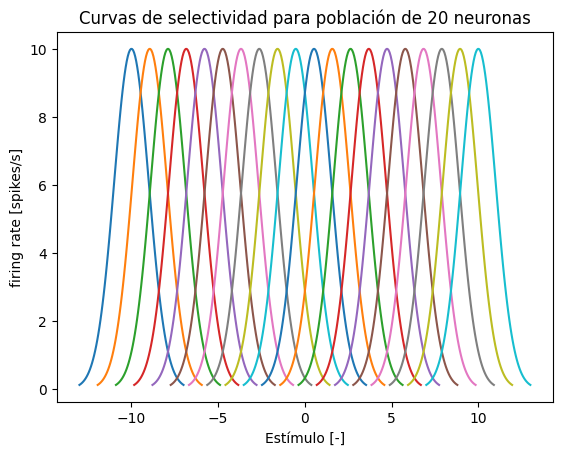

In [9]:
g_vector = np.empty(20, dtype=object) 
i = 0
for u in u_vector:
    mu = u
    variance = 1
    sigma = math.sqrt(variance)
    x_plot = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    gaussian_normalization = math.sqrt(2*np.pi)
    g_vector[i] =  10 * gaussian_normalization * stats.norm.pdf(x_plot, mu, sigma)
    plt.xlabel('Estímulo [-]')
    plt.ylabel('firing rate [spikes/s]')
    plt.title('Curvas de selectividad para población de 20 neuronas')
    plt.plot(x_plot, g_vector[i])
    i += 1  
plt.show()

El gráfico representa la respuesta de la población de neuronas frente a estímulos distribuidos en el vector [-10,10]. Los máximos de la respuesta de la población se alinean con las medias $\mu_{i}$ asociada a la curva de selectividad de cada neurona integrante de la población, esto indica que existen entradas *predilectas* para cada miembro de la población. Note que para estas entradas predilectas, dentro del intervalo de estímulo seleccionado, existirá una mayor tasa de disparo en promedio. 

### b) Sea x una variable aleatoria que distribuye uniformemente en el intervalo [−5, 5].


En primer lugar se genera el vector de las 10 realizaciones de x, denotado en el código como `x_vector`.

In [10]:
x_vector = np.random.uniform(-5,5,10)
print(x_vector)

[-4.25661462 -3.89246664 -3.27540019  4.38261804 -2.82744059 -4.82867114
 -3.21421866 -2.03976248 -2.87295144 -2.84540875]


Para estimar el vector de respuesta de la población de neuronas `r`, para cada valor $x_{j}$ del vector de estímulos X se obtiene el *firing rate* asociado a la i-ésima neurona, evaluando $f_{i}(x_{j})$, que corresponde al valor entregado por la curva de selectividad de la i-ésima neurona. Para obtener la respuesta de la i-ésima neurona, considerando que cada neurona sigue una distribución de Poisson ($P_{i}(k, \lambda)$). 

$$ P_{i}(k,\lambda_{i}) = \frac{\lambda_{i}^{k} \cdot e^{-\lambda_{i}}}{k!} $$

Donde $k$ corresponde al número de experimentos realizados sobre la neurona i-ésima en el intervalo de tiempo $t$ y $\lambda_{i}$ corresponde al número de disparos de la neurona i-ésima en un tiempo $t$, de esta forma $\lambda_{i} = f_{i}(x_{j})*t$. 


Se considera un número de experimentos $k=1$ realizados en un intervalo de tiempo $t=1$. De esta manera, la expresión asociada a la respuesta i-ésima, de la neurona i-ésima se reduce a la siguiente expresión:

$$ P_{i}(1,f_{i}(x_{j})) = f_{i}(x_{j}) \cdot e^{-f_{i}(x_{j})} $$

De esta forma, el vector de respuestas toma la siguiente forma:

$$ r[j,i] =  

\begin{pmatrix}
    P_{1}(1,f_{1}(x_{1})) & P_{2}(1,f_{2}(x_{1})) & \cdots & P_{20}(1,f_{20}(x_{1})) \\
    \vdots & \vdots & \ddots & \vdots \\ 
    P_{1}(1,f_{1}(x_{10})) & P_{2}(1,f_{2}(x_{10})) & \cdots & P_{20}(1,f_{20}(x_{10}))
\end{pmatrix}


$$

Note que para este caso $r_{10\times20}$.

In [11]:
r = {} 
for x in x_vector: # para cada variablea aleatoria x
    response = np.empty(len(u_vector), dtype=int) 
    i = 0
    for u in u_vector: # calcular la respuesta de cada neurona ( segun su curva de selectividad gausiana que depende de su media u)
        firing_rate = 10*math.exp(-(x-u)**2/2)
        time = 1 # segundo
        response[i] = np.random.poisson(lam=firing_rate*time, size=1) # obs: lam: lambda = fi(xi)*t 
        i += 1
    r[x] = response

for x in x_vector:
    print(r[x]) # r[x] implica la cantidad de spikes en cada neurona dada la entrada x

[0 0 0 0 1 9 8 6 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 4 9 4 1 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  1  2  7 10  5  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  4  6 10  5  1  0  0  0]
[ 0  0  0  0  0  2 11  7  3  3  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  2  2 12  3  1  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  5 11  9  1  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  2 16 11  5  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1 10  1  4  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  1  0  4 10  1  0  0  0  0  0  0  0  0  0  0  0]


Note que los resultados del vector `r`, muestra la cantidad de disparos (*spikes*), para cada neurona de la población dada la entrada $x_{i}$. Tomando el estímulo $x_{1}$ como ejemplo, se grafica la cantidad de disparos asociado a cada una de las neuronas de la población y se grafica también las curvas de selectividad asociadas a las neuronas que fueron activadas por el estímulo.

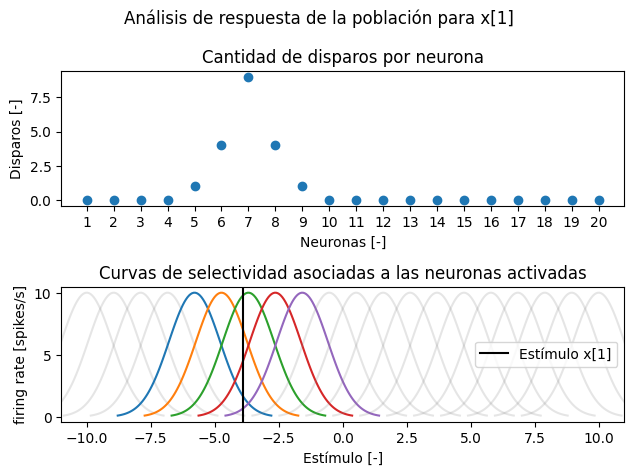

In [63]:
index = 1

fig, axs = plt.subplots(2)
fig.suptitle('Análisis de respuesta de la población para x[1]')

# spikes per neuron
neurons = np.linspace(1,20,20)
axs[0].scatter(neurons, r[x_vector[index]])
axs[0].set_title('Cantidad de disparos por neurona')
axs[0].set(xlabel='Neuronas [-]', ylabel='Disparos [-]')
axs[0].set_xticks(neurons)
#axs[0].grid(True)


# neurons activated

for i, resp in enumerate(r[x_vector[index]]):
    x_plot = np.linspace(u_vector[i] - 3*sigma, u_vector[i] + 3*sigma, 100)
    if(resp):
        axs[1].plot(x_plot,g_vector[i])

    else:
        axs[1].plot(x_plot,g_vector[i],color='gray',alpha=0.2)

axs[1].set_xlim([-11,11])
axs[1].set_title('Curvas de selectividad asociadas a las neuronas activadas')
axs[1].set(xlabel='Estímulo [-]', ylabel='firing rate [spikes/s]')
axs[1].axvline(x=x_vector[index], color='black',label='Estímulo x[1]')
axs[1].legend()

fig.tight_layout()
plt.show()

Como se puede observar en el gráfico, las neuronas cuyas estímulo predilecto esté en la vecindad del estímulo $x[1]$, serán las que se activen y por ende, generen una respuesta. Como se puede ver en el gráfico de cantidad de disparos por neurona, la neurona 7, es la que genera la mayor cantidad de disparos y coincide con que su estímulo predilecto está más cercano al estímulo $x[1]$. 